<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Deep%20learning%20with%20PyTorch/USA_real_estate_dataset_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
from torch.utils import data
from tqdm.notebook import tqdm 

In [7]:
dataset = pd.read_csv('/content/realtor-data.csv')
dataset.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [8]:
dataset.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,4.021590e+05,314887.000000,316400.000000,326858.000000,401962.000000,3.189770e+05
mean,6.807346e+05,3.497566,2.568654,16.743579,3262.014889,2.226308e+03
std,1.184903e+06,2.328350,2.406962,888.634953,2211.541802,3.357398e+03
min,1.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,1.999000e+05,2.000000,2.000000,0.200000,1880.000000,1.204000e+03
50%,3.990000e+05,3.000000,2.000000,0.570000,2809.000000,1.768000e+03
75%,7.200000e+05,4.000000,3.000000,2.240000,4530.000000,2.643000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06


In [9]:
dataset.full_address.dtype

dtype('O')

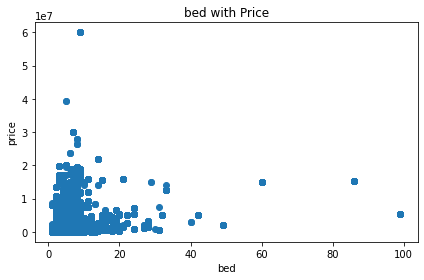

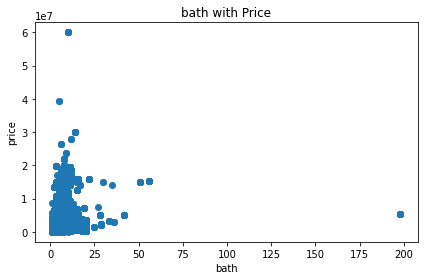

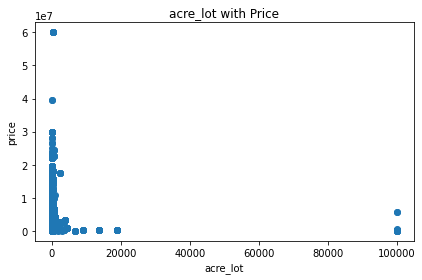

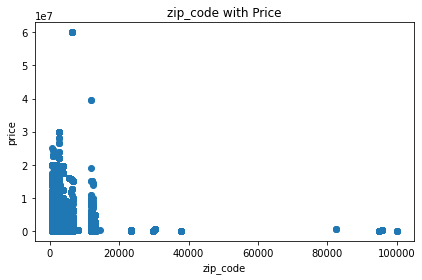

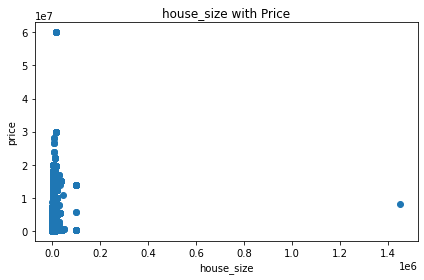

In [10]:
for each in dataset.columns.values:
  if each != 'price' and dataset[each].dtype!='O':
    plt.plot(dataset[each],dataset['price'] ,'o',)
    plt.title(f"{each} with Price")
    plt.xlabel(f"{each}")
    plt.ylabel("price")
    plt.tight_layout()

    plt.show()

In [11]:
X=dataset.copy()
X.drop(['price'],axis=1,inplace=True)
for each in X.columns:
  if X[each].dtype =='O':
    X.drop([each],axis=1,inplace=True)


Y=dataset.price

In [12]:
X.head()

,bed,bath,acre_lot,zip_code,house_size
0,3.0,2.0,0.12,601.0,920.0
1,4.0,2.0,0.08,601.0,1527.0
2,2.0,1.0,0.15,795.0,748.0
3,4.0,2.0,0.10,731.0,1800.0
4,6.0,2.0,0.05,680.0,NaN


In [13]:
for each in X.columns:
  print(X[each].isnull().value_counts())

False    314887
True      87272
Name: bed, dtype: int64
False    316400
True      85759
Name: bath, dtype: int64
False    326858
True      75301
Name: acre_lot, dtype: int64
False    401962
True        197
Name: zip_code, dtype: int64
False    318977
True      83182
Name: house_size, dtype: int64


In [14]:
X.fillna(method= 'ffill', inplace=True)

In [15]:
X.isna().sum()

bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
dtype: int64

In [16]:
Y.isna().sum()

0

Transform DataFrame to tensor

In [17]:
x_train = X.values 
y_train = np.log(Y).values 

Transform ndarray to tensor

In [19]:
x_train_tensor = torch.tensor(x_train).float()
y_train_tensor = torch.tensor(y_train).float()

Regression model with PyTorch

In [20]:
n_input = x_train_tensor.shape[1]
n_hidden = 64
n_output = 1

class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    self.l1 = nn.Linear(n_input, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)
    self.relu = nn.ReLU(inplace = True)

    self.features = nn.Sequential(
        self.l1,
        self.relu,
        self.l2 
    )

  def forward(self, x):
    x1 = self.features(x)
    return x1  

Print modul outline

In [22]:
net = Net(n_input, n_output, n_hidden)
print(net)

Net(
  (l1): Linear(in_features=5, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (features): Sequential(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)


Random seed

In [23]:
torch.manual_seed(20220214)
torch.cuda.manual_seed(20220214)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

Use GPU

In [24]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Transfer model to GPU
net = net.to(device)
# Transfer data to GPU
x_train_tensor = x_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

Mini batch dataLoader

In [25]:
train_tensor = data.TensorDataset(x_train_tensor, y_train_tensor)
# mini-batch size
batch_size = 1500 
# Train dataloader
train_loader = DataLoader(train_tensor,batch_size=batch_size,shuffle=True)

In [27]:
lr = 0.01

net = Net(n_input, n_output, n_hidden).to(device)
criterion = nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr = lr)

num_epochs = 50

learn_pro = np.zeros((0,2))

for epoch in range(num_epochs):
  train_loss = 0

  for x, y in tqdm(train_loader):
    x = x.to(device)
    y = y.to(device)

    optimizer.zero_grad()
    y_pred = net(x)

    loss = torch.sqrt(criterion(y_pred,y))

    loss.backward()
    optimizer.step()


  learn_pro = np.vstack((learn_pro,np.array([epoch,loss.item()])))
  print(f'Epoch {epoch} loss: {loss.item():.5f}')  

  0%|          | 0/269 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1500])) that is different to the input size (torch.Size([1500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 loss: 10.69130


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([159])) that is different to the input size (torch.Size([159, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 1 loss: 237.01062


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 2 loss: 13.82623


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 3 loss: 6.91181


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 4 loss: 14.57696


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 5 loss: 2.68617


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 6 loss: 2.05557


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 7 loss: 1.30187


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 8 loss: 1.14167


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 9 loss: 1.06508


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 10 loss: 1.18018


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 11 loss: 1.22775


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 12 loss: 1.12211


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 13 loss: 1.13995


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 14 loss: 1.07433


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 15 loss: 1.05414


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 16 loss: 1.02155


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 17 loss: 1.06877


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 18 loss: 1.18988


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 19 loss: 1.09200


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 20 loss: 0.99299


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 21 loss: 0.94260


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 22 loss: 1.03905


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 23 loss: 1.06938


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 24 loss: 1.17636


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 25 loss: 1.05122


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 26 loss: 1.14026


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 27 loss: 1.16237


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 28 loss: 0.92658


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 29 loss: 1.19204


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 30 loss: 1.17963


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 31 loss: 1.22242


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 32 loss: 1.10582


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 33 loss: 1.14600


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 34 loss: 1.13316


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 35 loss: 1.13096


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 36 loss: 1.14076


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 37 loss: 1.11382


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 38 loss: 1.11759


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 39 loss: 1.19616


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 40 loss: 1.04466


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 41 loss: 0.95748


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 42 loss: 1.01268


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 43 loss: 1.12648


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 44 loss: 1.16124


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 45 loss: 0.95188


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 46 loss: 1.10954


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 47 loss: 1.13415


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 48 loss: 1.27142


  0%|          | 0/269 [00:00<?, ?it/s]

Epoch 49 loss: 1.13528


visualize loss

Text(0, 0.5, 'RMSE')

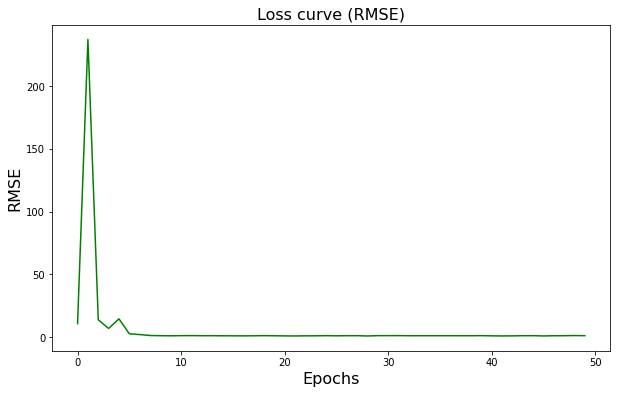

In [28]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
axes.plot(learn_pro[:,0],learn_pro[:,1],color='green')
axes.set_title('Loss curve (RMSE)',size=16)
axes.set_xlabel('Epochs',size=16)
axes.set_ylabel('RMSE',size=16)